# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values. 
     


# OBJECTIVE:
## DO EXPLORATORY DATA ANALYSIS ON THE ADULT INCOME DATASET

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns

In [55]:
#Reading the csv file into a dataframe.
adult = pd.read_csv("Data/adult.csv")

<b> DESCRIPTION OF DATA, NUMBER OF ROWS AND COLUMNS, SAMPLE OF FIRST 5 DATA POINTS </b>

In [56]:
print("SAMPLE OF FIRST 5 DATA POINTS:")
adult.head()

SAMPLE OF FIRST 5 DATA POINTS:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [57]:
initial_rows=adult.shape[0]

#### We observe that the data set has missing values as ?

In [58]:
print("SIZE OF DATASET (ROWS * COLUMNS): ",adult.shape)
print()
print("DESCRIPTION: ADULT.CSV WITH OBJECT DATA TYPE")
adult.describe(include="all")

SIZE OF DATASET (ROWS * COLUMNS):  (48842, 15)

DESCRIPTION: ADULT.CSV WITH OBJECT DATA TYPE


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### The data set has 48842 rows (data points) and 15 columns (attributes), Since all the missing values as '?' are treated as objects analyzing the description is a bit difficult so we first handle the missing values

### FROM HEAD WE OBSERVE THERE ARE SOME MISSING VALUES SO NOW WE HANDLE THE MISSING VALUES

In [59]:
#Reading the csv file into a dataframe while replacing every missing values NAN.
adult = pd.read_csv("Data/adult.csv",na_values=['?'])
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### All the missing values have been replaced by NAN

<b> NOW TO CHECK WHAT ALL KINDS OF DATA IS THERE IN THE DATA SET </b>

In [60]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<b>
FROM THE ABOVE WE CONCLUDE THAT 
    CONTINUOUS VALUES ARE: [age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week]
    DISCRETE VALUES ARE: [workclass, education, martial-status, occupation, relationship, race, gender, native-country, income]
</b>

In [61]:
#Finding number of null values in each column
adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<b> WORKCLASS HAS 2799 MISSING VALUES</b>

<b>OCCUPATION HAS 2809 MISSING VALUES</b>

<b>NATIVE-COUNTRY HAS 857 MISSING VALUES</b>

In [62]:
adult.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Observations
### age
    * Has very less outliers as it has almost same mean and median
    * average age is around 39 years with the oldest person being of 90 years.
    
### workclass
    * 33906 people are working in Private jobs

### education
    * 15784 people are High school graduates.

### educational-num
    * negligible outliers as mean and median are almost same.
    * the average education points are 10. 
    * 75 % people are having more than 12 education points.

### occupation
    * most of the working people are Prof-specialty	

### race
    * of all the people employed White people are the majority.

### gender 
    * The majority of working people are males.

### capital-gain and capital-loss
    * have a lot of outliers due to huge difference in mean and median
    * less than 25% of people have capital and that to in huge values

### hours-per-week
    * people are working for 40 hours per week on an average
    * Have very less outliers as the mean and median are almost equal
    * 75% people are working less than 45 hours with the maximum work hour per week being that of 99 HOURS!

### native-country
    * most of the people(43832 people) have their native country as United States

### income
    * 37155 people are earning <= 50K
   

# TREATMENT OF MISSING VALUES
### EITHER DROP THE MISSING VALUES OR REPLACE BY MEAN/MEDIAN

In [63]:
#finding all the missing values
adult.loc[adult["workclass"].isnull(),["occupation","workclass","native-country"]]

,occupation,workclass,native-country
4,NaN,NaN,United-States
6,NaN,NaN,United-States
13,NaN,NaN,United-States
22,NaN,NaN,United-States
35,NaN,NaN,United-States
...,...,...,...
48811,NaN,NaN,United-States
48812,NaN,NaN,United-States
48820,NaN,NaN,United-States
48822,NaN,NaN,United-States


## Observation: 
<b> From the above data we can see that if occupation is missing a value then so is workclass, </b>
<b> Also the majority of the missing values are from united States </b>

In [64]:
adult.loc[adult["native-country"].isnull(),["workclass"]]

,workclass
19,Private
65,Private
83,Self-emp-inc
188,State-gov
253,Federal-gov
...,...
48730,Self-emp-inc
48750,Self-emp-inc
48773,Self-emp-not-inc
48791,Private


###### We observe that 857 records have country missing but there is no pattern in them with other missing values.

# Eliminating the missing values from data frame

In [65]:
# dropna() allows to drop all those rows which have null values in them
adult.dropna(inplace=True)#inplace makes the changes in the dataframe
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### We observe from reduction in number of rows that the rows with null values have been dropped

In [66]:
# Verifying that there are no more Missing values left
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### From above we can see that there are no more missing values in the dataframe

In [67]:
#fnlwgt column is not required so we drop the column
adult.drop("fnlwgt",axis=1,inplace=True)

In [68]:
print("Percentage of rows lost: ",((initial_rows-adult.shape[0])/initial_rows)*100,"%")

Percentage of rows lost:  7.411653904426519 %


In [69]:
# So the final dataframe is
adult

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# UNIVARIATE ANALYSIS

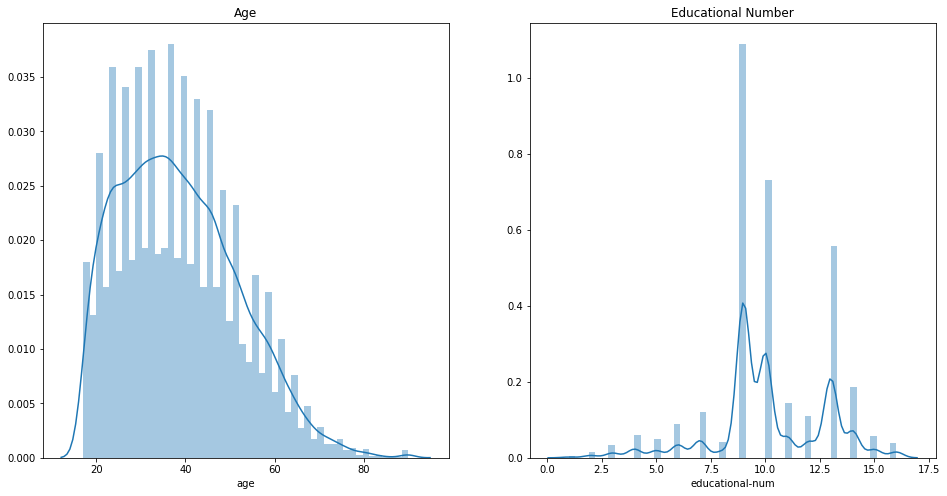

In [70]:
mlt.figure(figsize=(16, 8))

mlt.subplot(1,2,1)
sns.distplot(adult['age'])
mlt.title('Age')

mlt.subplot(1,2,2)
sns.distplot(adult['educational-num'])
mlt.title('Educational Number')

mlt.show()

# Obervations:-
#### age
    * most of people are in the age goup of 35 - 45
    * No symmetery in age duistubution,.
    * age range from 17 to 90
    
#### educational _num:-
    * Uneven distbution.
    * higest distubution between 8-9.

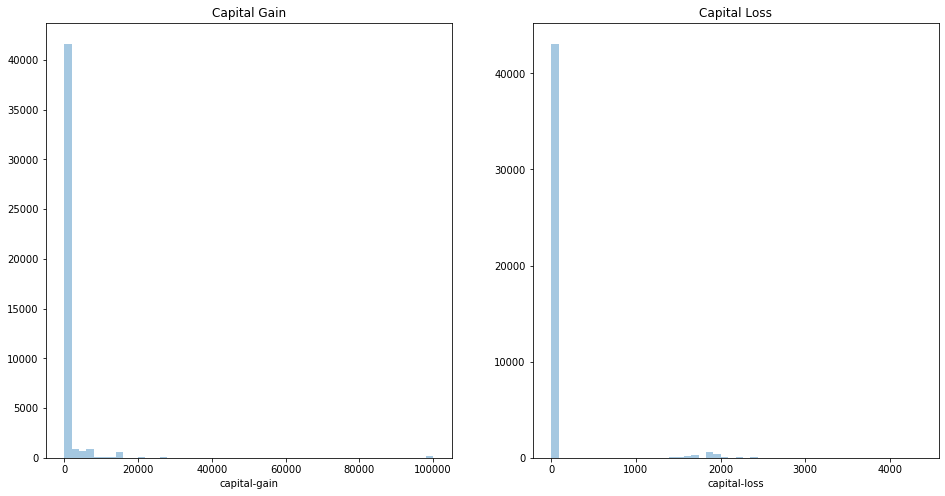

In [74]:
mlt.figure(figsize=(16, 8))

mlt.subplot(1,2,1)
sns.distplot(adult['capital-gain'],hist=True,kde=False)
mlt.title('Capital Gain')

mlt.subplot(1,2,2)
sns.distplot(adult['capital-loss'],hist=True,kde=False)
mlt.title('Capital Loss')

mlt.show()

### we observe from the above graph that 90 to 95% values are zero and rest are some really big values which are outliers

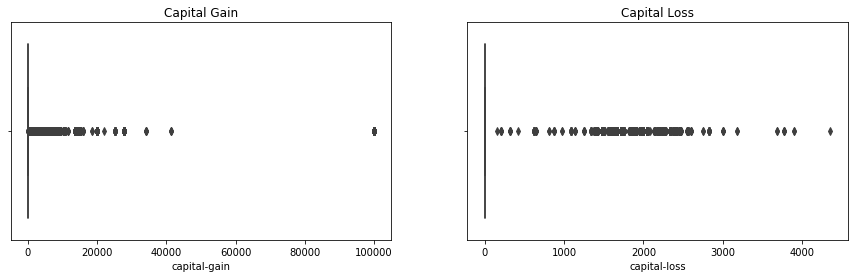

In [79]:
mlt.figure(figsize=(15, 4))
mlt.subplot(121)
sns.boxplot(adult['capital-gain'])
mlt.title('Capital Gain')
mlt.subplot(122)
sns.boxplot(adult['capital-loss'])
mlt.title('Capital Loss')
mlt.show()

### Box plot confirms our previous observation, there are lot of outliers in capital gain and loss
### almost all the people have 0 capital gain or loss

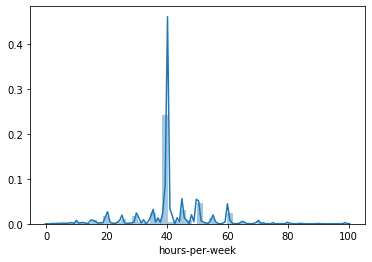

In [80]:
sns.distplot(adult["hours-per-week"])
mlt.show()

<b> Between 0 to 99 hours per week the average or the hours worked by most of the people are 40 hours </b>

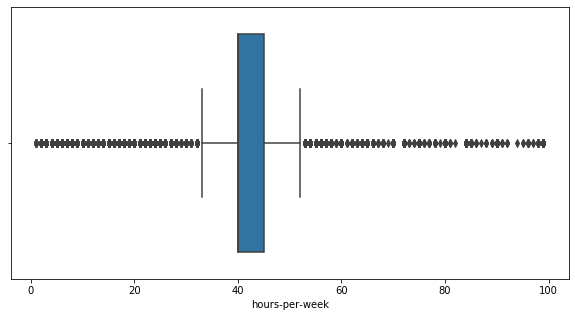

In [81]:
mlt.figure(figsize=(10,5))
sns.boxplot(adult['hours-per-week'])
mlt.show()

<p>We find that there are large number of outliers in it</p>
<p>40 is the median of the data and the majority people are working between 35 to 55 hours per week</p> 

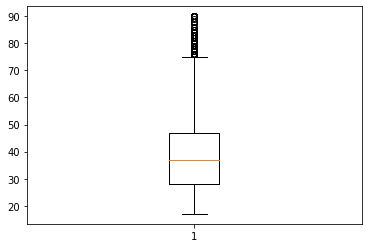

In [77]:
mlt.boxplot(adult["age"])
mlt.show()

### Age:-
    * median is 37
    * distubution of age is in between 20 and 75.
    * we are having outliers in age group of more than 75.

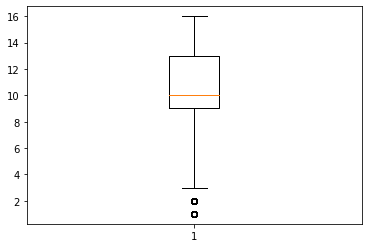

In [78]:
mlt.boxplot(adult["educational-num"])
mlt.show()

### educatioanl-num    
    * majority of educational points lies between 5 to 16.
    * less number of outliers, and very few people have points less then 2.

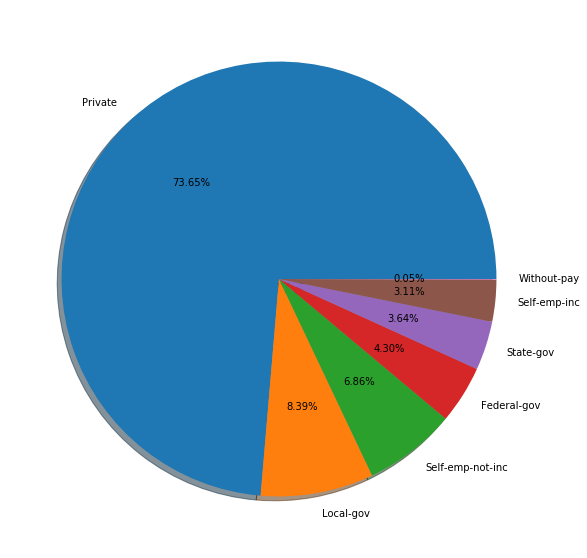

In [82]:
mlt.figure(figsize=(10,10))
mlt.pie(adult["workclass"].value_counts(),autopct='%.2f%%', shadow=True,labels=adult.workclass.unique())
mlt.show()

### From the above percentage distribution we conclude that majority people are working in private jobs

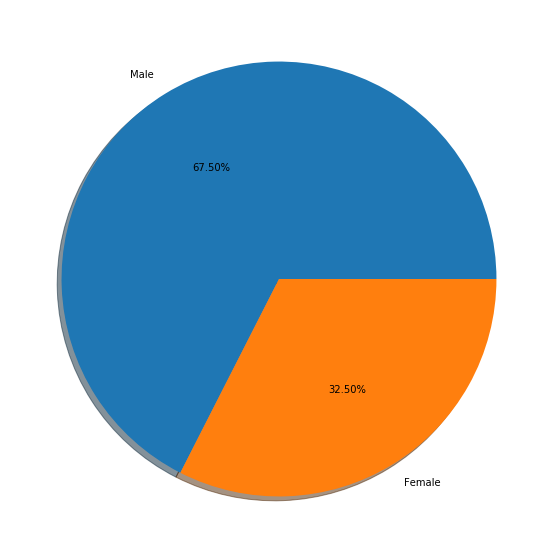

In [83]:
# Percentage distribution on basis of gender
mlt.figure(figsize=(10,10))
mlt.pie(adult["gender"].value_counts(),autopct='%.2f%%', shadow=True,labels=adult.gender.unique())
mlt.show()

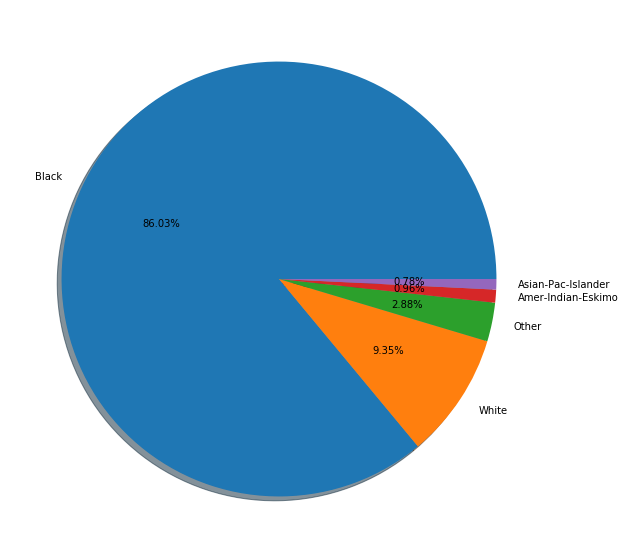

In [84]:
# percentage distribution of races
mlt.figure(figsize=(10,10))
mlt.pie(adult["race"].value_counts(),autopct='%.2f%%', shadow=True,labels=adult.race.unique())
mlt.show()

### there are 86% black people

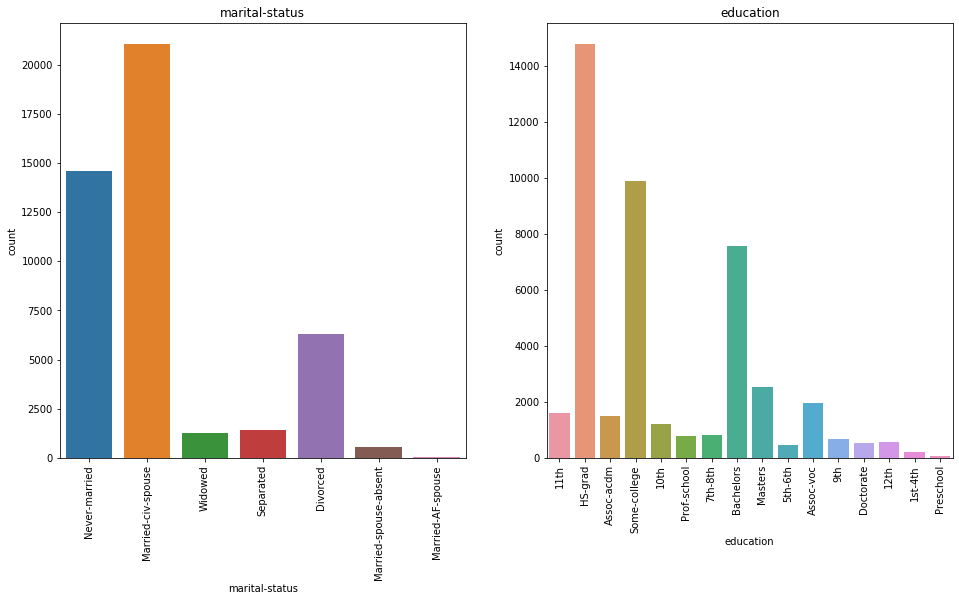

In [87]:
mlt.figure(figsize=(16, 8))

mlt.subplot(1,2,1)
sns.countplot(adult['marital-status'])
mlt.xticks(rotation=90)
mlt.title('marital-status')

mlt.subplot(1,2,2)
sns.countplot(adult['education'])
mlt.xticks(rotation=90)
mlt.title('education')

mlt.show()

#### marital-status
    *This marital-status attribute has 7 unique categories.
    *Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
    *Married-civ-spouse has maximum number of samples.
    *Married-AF-spouse has minimum number of observations.
    
#### Education
    * Most number of people having education HS-grad.(15784)
    * Very Less people having education only till pre school.
    * HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
    

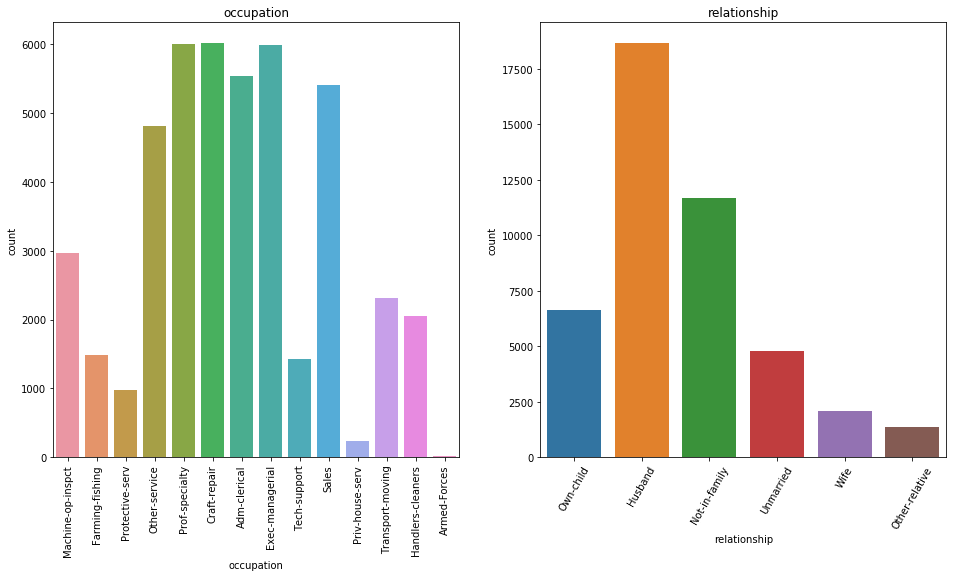

In [88]:
mlt.figure(figsize=(16, 8))

mlt.subplot(1,2,1)
sns.countplot(adult['occupation'])
mlt.xticks(rotation=90)
mlt.title('occupation')

mlt.subplot(1,2,2)
sns.countplot(adult['relationship'])
mlt.xticks(rotation=60)
mlt.title('relationship')

mlt.show()

#### occupation

    * 14 Different types of occputation.
    * Prof-specialty has the maximum count(8981) 

#### Relationship

    * 6 different type of relation.
    * the max count is of Husband(18666)
    * the min count is having Other-relative(1349)

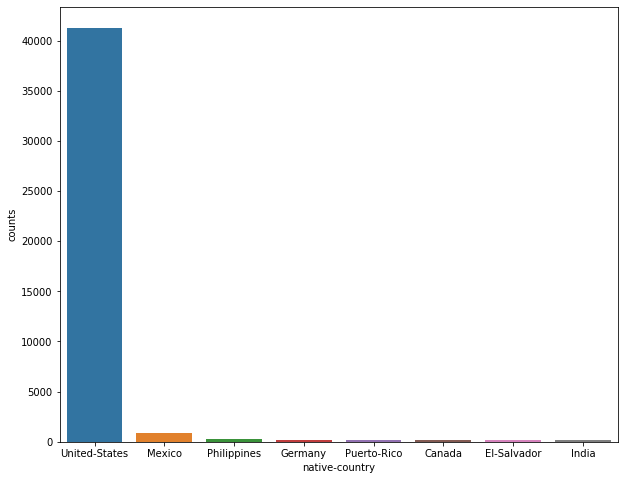

In [89]:
mlt.figure(figsize=(10,8))
mlt.ylabel('counts')
mlt.xlabel('native-country')
sns.barplot(adult['native-country'].value_counts().index[:8] , adult['native-country'].value_counts().values[:8])
mlt.show()

### Almost all people are from United States

# BIVARIATE ANALYSIS

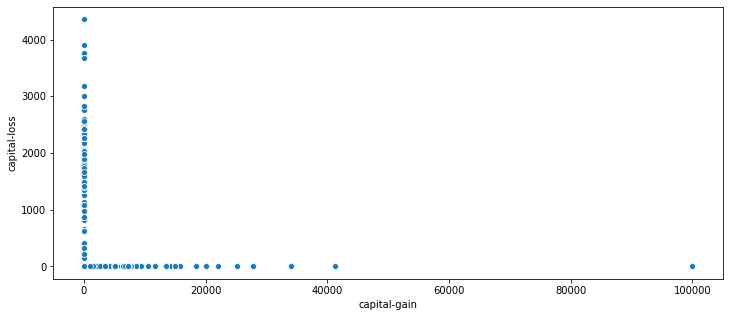

In [90]:
mlt.figure(figsize=(12,5))
sns.scatterplot(x = adult['capital-gain'], y = adult['capital-loss'])
mlt.show()

#### We can say that either there is gain or loss but they cannot occur simultaneously but they both can be zero

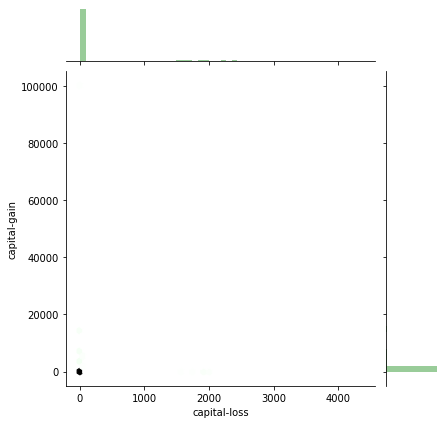

In [92]:
sns.jointplot(x='capital-loss', y='capital-gain',kind= 'hex', data=adult, color='g')
mlt.show()

#### The joint plot confirms that majority of the gain or loss is zero

<Figure size 2160x720 with 0 Axes>

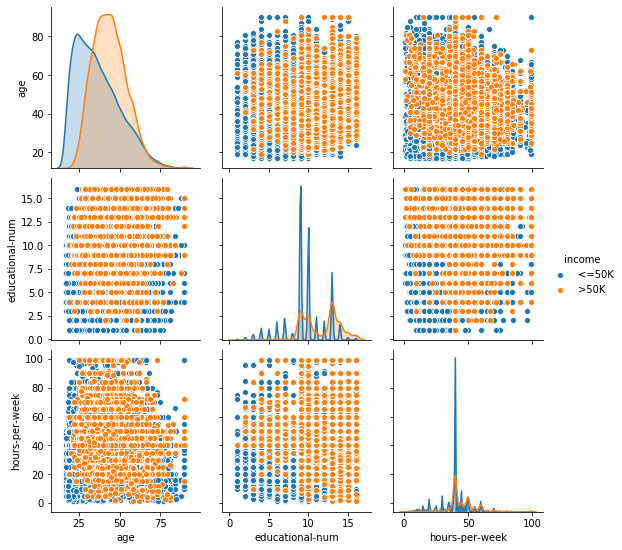

In [98]:
mlt.figure(figsize=(30,10))
sns.pairplot(adult,hue='income',vars=["age","educational-num","hours-per-week" ])
mlt.show()

# Analysis:
    * People having More age having income >=50k.
    * People having more age and Having more educational Number Have more income.
    * People Having more educational numbers have more income.
    * People Having more educational num are working less .

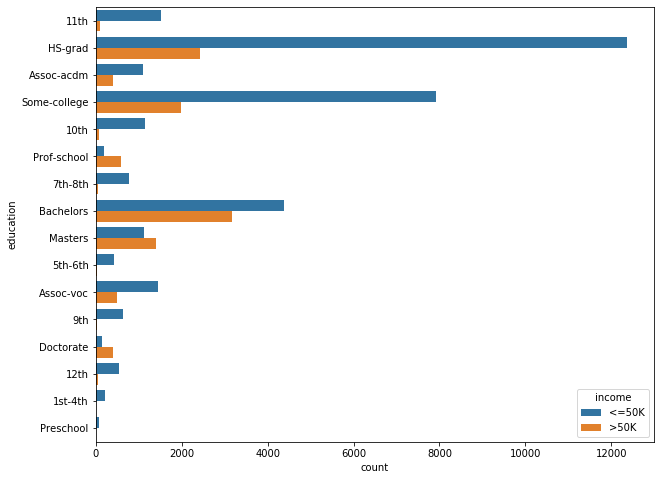

In [99]:
mlt.figure(figsize=(10,8))
sns.countplot(y="education",data=adult,hue="income")
mlt.show()

    * Bachelors are having the income >= 50K.
    * Hs-grad people's are having more count of people getting the income less then 50k.

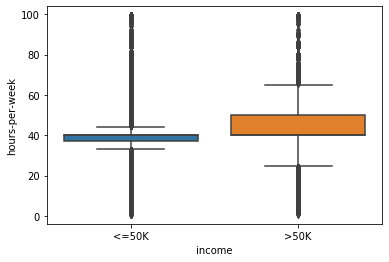

In [100]:
sns.boxplot(y='hours-per-week', x='income',data=adult)
mlt.show()

### People working more hours per week are getting more income and there are people who work for more than 65 hours and still get <= 50K

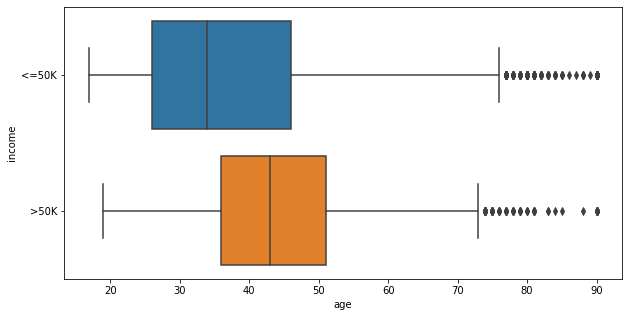

In [102]:
mlt.figure(figsize=(10,5))
sns.boxplot(x="age",data=adult,y="income")
mlt.show()

    * People having age group Between 20 to 75 are getting >50k income.
    * range of people getting more income is 35 - 52 age grroup.

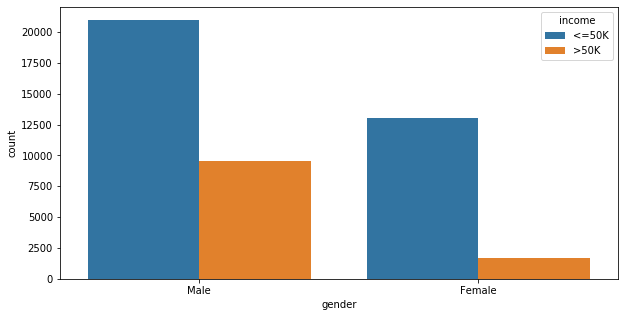

In [101]:
mlt.figure(figsize=(10,5))
sns.countplot(x="gender",data=adult,hue="income")
mlt.show()

#### More number of males are getting paid >50K compared to females